In [1]:
import os
import time
import pyexiv2
import subprocess
import numpy as np
from tqdm import tqdm
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotalt import show_with_alt

In [2]:
# Get all notebook paths from the matplotlib gallery
# NOTE: excludes animation examples as they aren't currently supporded by matplotalt
notebook_paths = []
notebook_names = []
gallery_path = "./gallery_jupyter"
for notebook_dir in os.listdir(gallery_path):
    notebook_dir_path = os.path.join(gallery_path, notebook_dir)
    if os.path.isdir(notebook_dir_path):
        for notebook_name in os.listdir(notebook_dir_path):
            notebook_path = os.path.join(notebook_dir_path, notebook_name)
            if os.path.isfile(notebook_path) and notebook_name.endswith(".ipynb"):
                notebook_paths.append(notebook_path)
                notebook_names.append(notebook_name)
print(len(notebook_paths))

500


In [7]:
# Run alttextify on each matplotlib example notebook
notebook_output_path = "./gallery_with_alt"
fig_output_path = "./alt_figs"
nb_execution_times = []
for nb_idx, nb_path in enumerate(tqdm(notebook_paths)):
    start = time.time()
    subprocess.run(["alttextify", nb_path,
                f"{notebook_output_path}/nb_{nb_idx}_{notebook_names[nb_idx]}",
                "-l", "3",
                "-t", "30",
                "-s", "html", "img_file",
                "-so", f"{fig_output_path}/nb_{nb_idx}"])
    end = time.time()
    nb_execution_times.append(end - start)

print(f"Total execution time: {np.sum(nb_execution_times)}")
print(f"Mean execution time: {np.mean(nb_execution_times)}")
np.save("./nb_execution_times", nb_execution_times)

100%|██████████| 500/500 [1:20:11<00:00,  9.62s/it]

Total execution time: 4811.465373277664
Mean execution time: 9.622930746555328


A bar chart. Number of notebooks is plotted on the y-axis from 0 to 200, and execution time (s) is plotted on the x-axis from 4 to 16, both using linear scales. The data have 9 bars, a minimum value of y=0 at x=0, a maximum value of y=172 at x=3, and an average of y=54.78.

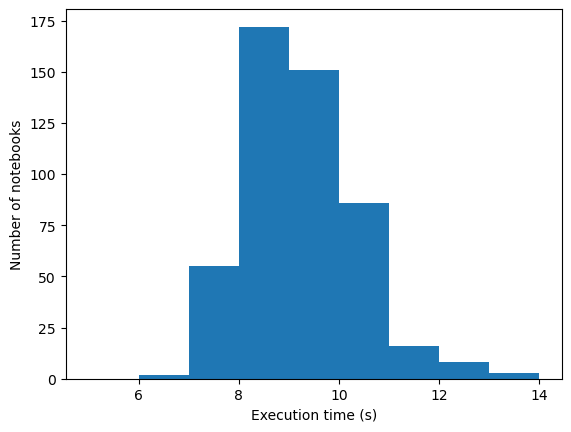

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot histogram of execution times
nb_execution_times = np.load("./nb_execution_times.npy")
plt.hist(nb_execution_times, bins=list(range(5, 15, 1)))
plt.ylabel("Number of notebooks")
plt.xlabel("Execution time (s)")
show_with_alt(methods="markdown")

240



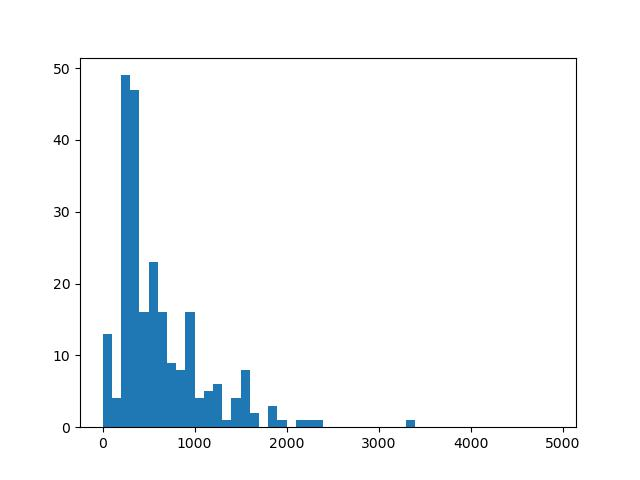


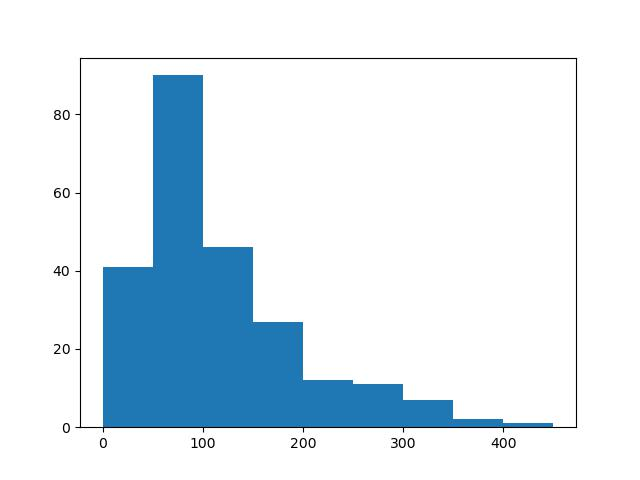

<Figure size 640x480 with 0 Axes>

In [9]:
# Extract image descriptions from figures
nb_id_to_captions = {}
caption_lens = []
caption_tok_counts = []
for fig_with_caption in os.listdir(fig_output_path):
    fig_path = os.path.join(fig_output_path, fig_with_caption)
    with open(fig_path, 'rb+') as img_f:
        with pyexiv2.ImageData(img_f.read()) as pyexif_img:
            exif_data = pyexif_img.read_exif()
            if 'Exif.Image.ImageDescription' in exif_data:
                fig_caption = exif_data['Exif.Image.ImageDescription']
                nb_id = fig_with_caption.split(".")[0][3:]
                nb_id_to_captions[nb_id] = fig_caption
                caption_lens.append(len(fig_caption))
                caption_tok_counts.append(len(fig_caption.split(" ")))

print(len(nb_id_to_captions))
plt.hist(caption_lens, bins=list(range(0, 5000, 100)))
show_with_alt()
plt.hist(caption_tok_counts, bins=list(range(0, 500, 50)))
show_with_alt()

In [10]:
for nb_id, caption in nb_id_to_captions.items():
    print(nb_id, caption)

0 A 10x10 image. The x-axis ranges from −2 to 10, the y-axis ranges from −2 to 10, and the z-axis ranges from 0.03307 to 0.9778, all using linear scales. The data have a minimum value of z=0.03307 at (9, 3), a maximum value of z=0.9778 at (0, 4), and an average of z=0.5512.
1 A figure with 5 subplots. subplot 1: a 15x15 image. The x-axis ranges from −4 to 4, the y-axis ranges from −4 to 3, and the z-axis ranges from -1.694 to 1.386, all using linear scales. The data have a minimum value of z=-1.694 at (10, 9), a maximum value of z=1.386 at (7, 6), and an average of z=0.00283. subplot 2: a 15x15 image. The x-axis ranges from −3 to 4, the y-axis ranges from −4 to 3, and the z-axis ranges from -1.694 to 1.386, all using linear scales. The data have a minimum value of z=-1.694 at (10, 9), a maximum value of z=1.386 at (7, 6), and an average of z=0.00283. subplot 3: a 15x15 image. The x-axis ranges from −4 to 4, the y-axis ranges from −4 to 3, and the z-axis ranges from -1.694 to 1.386, all